In [1]:
%load_ext watermark
%watermark

2017-09-27T20:26:25+02:00

CPython 3.6.1
IPython 5.3.0

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.10.0-35-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

Para este ejemplo vamos a utilizar el [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es un dataset de imagenes de celulas obtenidas de analisis de personas que sufren un posible cancer de mama.

Las imagenes tienen el siguiente aspecto:

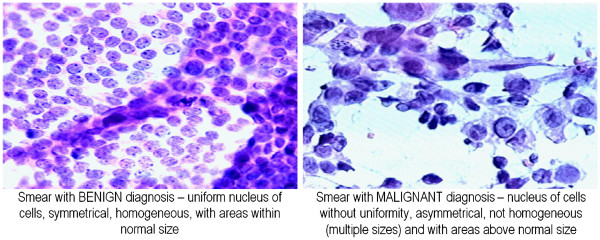

In [29]:
from IPython.display import Image

Image("../../media/breast_cancer.jpeg")

In [30]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [32]:
print(cancer_datos["DESCR"])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [33]:
cancer_datos["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [34]:
cancer_datos.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [35]:
cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target

El dataset contiene los valores medios de ciertos parametros del núcleo de las celulas mostradas en las imágenes, así como dichos valores para la celula con características más preocupantes

In [36]:
cancer_df.shape

(569, 31)

In [37]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [39]:
cancer_df.objetivo.value_counts(True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

variables_entrenamiento = cancer_datos["feature_names"]
variable_objetivo = "objetivo"

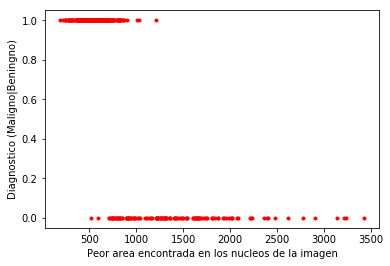

In [42]:
columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df.objetivo, '.r')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [43]:
modelo_ols = LinearRegression()

modelo_ols.fit(train_df[[columna_entrenamiento]],
               train_df[variable_objetivo])

predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])

predicciones[:10]

array([ 0.14885936,  0.84135353,  0.78428984,  0.69850579, -1.48889344,
        0.68933035,  0.96233104,  0.90174802,  0.76908124,  0.8652348 ])

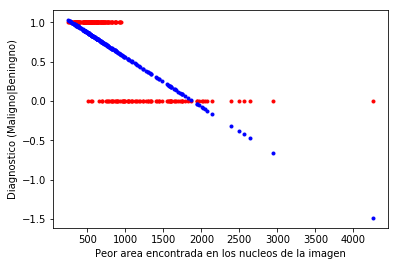

In [44]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

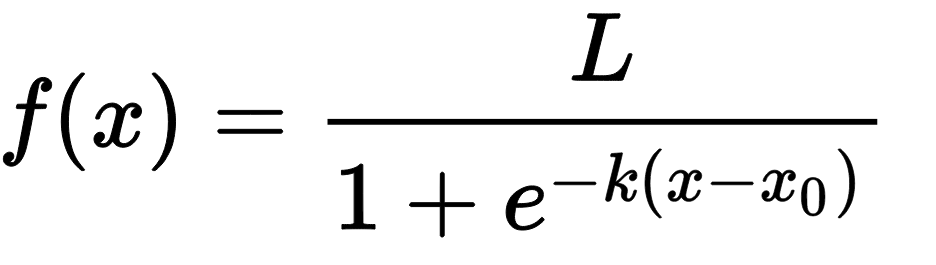

In [45]:
Image("../../media/funcion_logistica.png")

In [47]:
from ipywidgets import interact

def funcion_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))


@interact(L=range(1,10), k=range(-5, 5), x0=range(-10,10))
def plot_funcion_logit(L, k, x0):
    x = np.linspace(-5*k, 5*k, 500)
    y = funcion_logit(x, k=k, L=L, x0=x0)
    plt.figure(1)
    plt.plot(x, y)
    plt.show()

In [48]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))

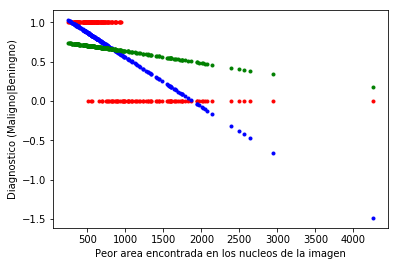

In [49]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

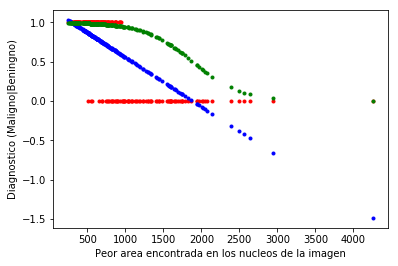

In [50]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=5)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LogisticRegression??

In [53]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [54]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

predicciones[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [55]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[  4.34958995e-03,   9.95650410e-01],
       [  2.28448105e-03,   9.97715519e-01],
       [  3.89390904e-02,   9.61060910e-01],
       [  8.00232409e-04,   9.99199768e-01],
       [  1.16441054e-01,   8.83558946e-01],
       [  5.62825297e-02,   9.43717470e-01],
       [  4.13232423e-03,   9.95867676e-01],
       [  5.72269511e-05,   9.99942773e-01],
       [  1.35846082e-03,   9.98641539e-01],
       [  9.99992738e-01,   7.26160639e-06]])

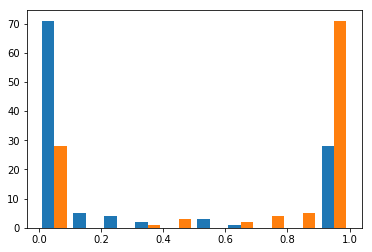

In [56]:
plt.hist(predicciones_probabilidades);

In [57]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [59]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, probs_df], axis=1)
X[["objetivo", "prediccion", 0, 1]].head(20)

,objetivo,prediccion,0,1
0,1,1,0.004350,9.956504e-01
1,1,1,0.002284,9.977155e-01
2,1,1,0.038939,9.610609e-01
3,1,1,0.000800,9.991998e-01
4,1,1,0.116441,8.835589e-01
5,1,1,0.056283,9.437175e-01
6,1,1,0.004132,9.958677e-01
7,1,1,0.000057,9.999428e-01
8,1,1,0.001358,9.986415e-01
9,0,0,0.999993,7.261606e-06
